In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy import stats
import sys

In [11]:
sys.path.insert(0, '/Users/cynthiachen/Downloads/Internship2019/degron_mutation/deepDegron')
from train_nn import *

In [7]:
# Load pre-trained neural network models from pickle file
model_bag_of_words = pickle.load(open( "../neural_network_bag_of_words_v2.pickle", "rb" ))
model_pos_specific = pickle.load(open( "../neural_network_pos_specific_v2.pickle", "rb" ))

# Create pd dataframe of sequence information 
degron_pred = pd.read_csv("../data/degron_pred.csv", index_col=0)
# Select column of input sequences
input_seq = degron_pred.iloc[:, 10]

In [40]:
# Use compute_feature_matrix function to encode sequences
features = compute_feature_matrix(input_seq, 6, True)
condensed_features = features[:, 0:20] # Remove zeros at the end for bag of words prediction

In [41]:
# Use pre-trained model to predict sequence degredataion
pred_bow_wt = model_bag_of_words.predict_proba(condensed_features) # wild-type bag of words prediction
pred_ps_wt = model_pos_specific.predict_proba(features)            # wild-type position-specific prediction
drp_wt = pred_ps_wt-pred_bow_wt                                    # wild-type degron regulatory potential

In [31]:
# def mutate(seq, index, newchar):
#     char_list = list(seq)
#     char_list[index] = newchar
#     return "".join(char_list)

In [30]:
# Convert string to 2D list of characters

seqlist = [] # 2D list of all sequences, with each character as 1 entry 
for sequence in input_seq:
    seqlist.append(list(sequence))

In [31]:
# Mutation 1: Shift mutation
# Shifts all the characters at a certin position down by 1 sequence, with the first sequence
# filled by the last sequence

seq_length = len(seqlist[0]) # 23
num_seq = len(seqlist)       # number of total sequences
shift = 1                    # distance to shift characters by

pos = 0 # revise this later
first = seqlist[0][pos]
for i in range(num_seq-shift):
    #for j in range(seq_length) - iterate through positions
    seqlist[i][pos] = seqlist[i+shift][pos]
seqlist[num_seq-shift][pos]=first

In [32]:
mutated_seqs = []
for i in range(num_seq):
    mutated_seqs.append("".join(seqlist[i])) 

In [34]:
# Use compute_feature_matrix function to encode sequences
features = compute_feature_matrix(pd.Series(mutated_seqs), 6, True)
condensed_features = features[:, 0:20] # Remove zeros at the end for bag of words prediction

# Use pre-trained model to predict sequence degredataion
# Use pre-trained model to predict sequence degredataion
pred_bow_mut = model_bag_of_words.predict_proba(condensed_features) # bag of words prediction
pred_ps_mut = model_pos_specific.predict_proba(features)            # position-specific prediction
drp_mut = pred_ps_mut-pred_bow_mut                                  # mutated degron regulatory potential

In [42]:
diff = drp_wt-drp_mut

In [44]:
vect = np.asarray(diff[:, 0])

In [45]:
np.histogram(vect)

(array([   43,   171,   388,  1255, 10858,  2650,   596,   194,    79,    22]),
 array([-0.72348398, -0.5685046 , -0.41352522, -0.25854585, -0.10356647,
         0.05141291,  0.20639229,  0.36137167,  0.51635104,  0.67133042,
         0.8263098 ]))

/Users/cynthiachen/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


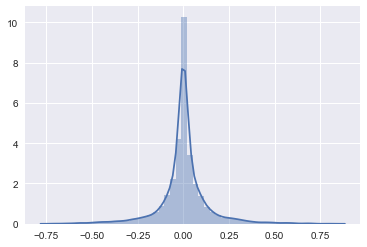

In [58]:
sns.set(color_codes=True)
x = np.random.normal(size=200)
sns.distplot(diff)
plt.show()

In [51]:
np.average(diff)

0.0026954324